# Forex Trend Prediction

In [212]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [213]:
# Dataset Load

df = pd.read_csv('/Users/arietrisn/Documents/Career/Data Analyst:Science/Bootcamp/Forex Trend Analysis Project/clean_xauusd.csv')
df.head()

,date,price,open,high,low,change
0,2024-12-31,2623.81,2606.13,2627.85,2602.50,0.0071
1,2024-12-30,2605.39,2620.30,2628.61,2595.90,-0.0056
2,2024-12-27,2620.00,2634.59,2638.74,2611.30,-0.0055
3,2024-12-26,2634.43,2619.79,2639.40,2614.13,0.0081
4,2024-12-24,2613.20,2613.07,2621.83,2609.92,0.0001


In [214]:
df = df.sort_values(by='date', ascending=True).reset_index(drop=True)

In [215]:
df.head()

,date,price,open,high,low,change
0,2014-01-01,1205.90,1210.41,1210.61,1199.40,0.0003
1,2014-01-02,1224.89,1204.88,1231.04,1203.72,0.0157
2,2014-01-03,1236.55,1224.94,1240.38,1222.14,0.0095
3,2014-01-06,1238.05,1236.93,1248.76,1233.10,0.0012
4,2014-01-07,1232.10,1238.17,1245.86,1225.20,-0.0048


In [216]:
df.shape

(2863, 6)

# Model Training Random Forest Classification
Predict the upside or downside trend using Random Forest Classification <br>
0 = down<br>
1 = up

In [217]:
xauusd01 = df.copy()
xauusd01.head()

,date,price,open,high,low,change
0,2014-01-01,1205.90,1210.41,1210.61,1199.40,0.0003
1,2014-01-02,1224.89,1204.88,1231.04,1203.72,0.0157
2,2014-01-03,1236.55,1224.94,1240.38,1222.14,0.0095
3,2014-01-06,1238.05,1236.93,1248.76,1233.10,0.0012
4,2014-01-07,1232.10,1238.17,1245.86,1225.20,-0.0048


In [218]:
# Adding tomorrow price in feature
xauusd01['tomorrow'] = xauusd01['price'].shift(-1)
xauusd01.head()

,date,price,open,high,low,change,tomorrow
0,2014-01-01,1205.90,1210.41,1210.61,1199.40,0.0003,1224.89
1,2014-01-02,1224.89,1204.88,1231.04,1203.72,0.0157,1236.55
2,2014-01-03,1236.55,1224.94,1240.38,1222.14,0.0095,1238.05
3,2014-01-06,1238.05,1236.93,1248.76,1233.10,0.0012,1232.10
4,2014-01-07,1232.10,1238.17,1245.86,1225.20,-0.0048,1226.10


In [219]:
# Setting the target column
# If the tomorrow value is more than the price of today then it will be 1 or indicates an up in price

xauusd01['target'] = (xauusd01['tomorrow'] > xauusd01['price']).astype(int)
xauusd01.head()

,date,price,open,high,low,change,tomorrow,target
0,2014-01-01,1205.90,1210.41,1210.61,1199.40,0.0003,1224.89,1
1,2014-01-02,1224.89,1204.88,1231.04,1203.72,0.0157,1236.55,1
2,2014-01-03,1236.55,1224.94,1240.38,1222.14,0.0095,1238.05,1
3,2014-01-06,1238.05,1236.93,1248.76,1233.10,0.0012,1232.10,0
4,2014-01-07,1232.10,1238.17,1245.86,1225.20,-0.0048,1226.10,0


In [220]:
xauusd01['target'].value_counts()

target
1    1484
0    1379
Name: count, dtype: int64

In [221]:
xauusd01 = xauusd01.set_index('date')

In [222]:
# Drop any NaN values
xauusd01 = xauusd01.dropna()
xauusd01.head()

,price,open,high,low,change,tomorrow,target
date,,,,,,,
2014-01-01,1205.90,1210.41,1210.61,1199.40,0.0003,1224.89,1
2014-01-02,1224.89,1204.88,1231.04,1203.72,0.0157,1236.55,1
2014-01-03,1236.55,1224.94,1240.38,1222.14,0.0095,1238.05,1
2014-01-06,1238.05,1236.93,1248.76,1233.10,0.0012,1232.10,0
2014-01-07,1232.10,1238.17,1245.86,1225.20,-0.0048,1226.10,0


In [223]:
xauusd01.shape

(2862, 7)

In [224]:
# Splitting the data
# Because the data is timeseries we have to use TimeSeriesSplit

predictors = ['price', 'open', 'high', 'low']

X = xauusd01[predictors]
y = xauusd01['target']

from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(test_size = 572)

for fold, (train_index, test_index) in enumerate(tscv.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2290, 4)
(572, 4)
(2290,)
(572,)


In [225]:
# Model Training
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(min_samples_split=100, random_state=1)

model.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [226]:
# Model Evaluation Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Create a function for metrics
def metrics(test, pred):
    accuracy = accuracy_score(test, pred)
    precision = precision_score(test, pred)
    recall = recall_score(test, pred)
    
    result = {
        'Accuracy'  : accuracy,
        'Precision' : precision,
        'Recall'    : recall
    }
    
    return result

y_pred = model.predict(X_test)
metrics(y_test, y_pred)

{'Accuracy': 0.4755244755244755,
 'Precision': 0.5117647058823529,
 'Recall': 0.28618421052631576}

In [227]:
# Visualize feature importances
import shap

importances = model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': predictors, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

  Feature  Gini Importance
0   price         0.272673
1    open         0.248082
3     low         0.244574
2    high         0.234671


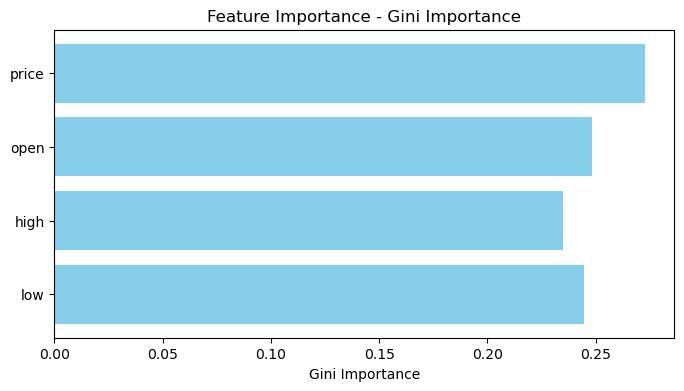

In [228]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(predictors, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

## Model Evaluation

Backtesting

In [229]:
xauusd01.shape

(2862, 7)

In [230]:
# Create a predict function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['target'])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0 
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['target'], preds], axis=1)
    return combined

In [231]:
# Create a backtest function
def backtest(data, model, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [232]:
model = RandomForestClassifier(random_state=1)
predictions = backtest(xauusd01, model, predictors)
metrics(predictions['target'], predictions['Predictions'])

{'Accuracy': 0.49632892804698975,
 'Precision': 0.5501066098081023,
 'Recall': 0.3519781718963165}

In [233]:
# Adding new feature

horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = xauusd01.rolling(horizon).mean()

    ratio_column = f'Close_Ratio{horizon}'
    xauusd01[ratio_column] = xauusd01['price'] / rolling_averages['price']

    trend_column = f'Trend_{horizon}'
    xauusd01[trend_column] = xauusd01.shift(1).rolling(horizon).sum()['target']

    new_predictors += [ratio_column, trend_column]

In [234]:
xauusd01.head()

,price,open,high,low,change,tomorrow,target,Close_Ratio2,Trend_2,Close_Ratio5,Trend_5,Close_Ratio60,Trend_60,Close_Ratio250,Trend_250,Close_Ratio1000,Trend_1000
date,,,,,,,,,,,,,,,,,
2014-01-01,1205.90,1210.41,1210.61,1199.40,0.0003,1224.89,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,1224.89,1204.88,1231.04,1203.72,0.0157,1236.55,1,1.007812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,1236.55,1224.94,1240.38,1222.14,0.0095,1238.05,1,1.004737,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,1238.05,1236.93,1248.76,1233.10,0.0012,1232.10,0,1.000606,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,1232.10,1238.17,1245.86,1225.20,-0.0048,1226.10,0,0.997591,1.0,1.003749,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [235]:
xauusd01 = xauusd01.dropna()

# Model Comparison
Random Forest <br>
Gradient Boosting <br>
K N Neighbors <br>
XGBoost Classifier 

In [236]:
# Importing Models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

models = {
    'rfc' : RandomForestClassifier(),
    'gbc' : GradientBoostingClassifier(),
    'knn' : KNeighborsClassifier(),
    'xgb' : xgb.XGBClassifier(),
    'dtc' : DecisionTreeClassifier()
}

In [242]:
# Training and testing the metrics

model_name = []
accuracy_result = []
precision_result = []

for name, model in models.items():
    predictions = backtest(xauusd01, model, new_predictors)
    accuracy = accuracy_score(predictions['target'], predictions['Predictions'])
    precision = precision_score(predictions['target'], predictions['Predictions'])

    model_name.append(name)
    accuracy_result.append(accuracy*100)
    precision_result.append(precision *100)


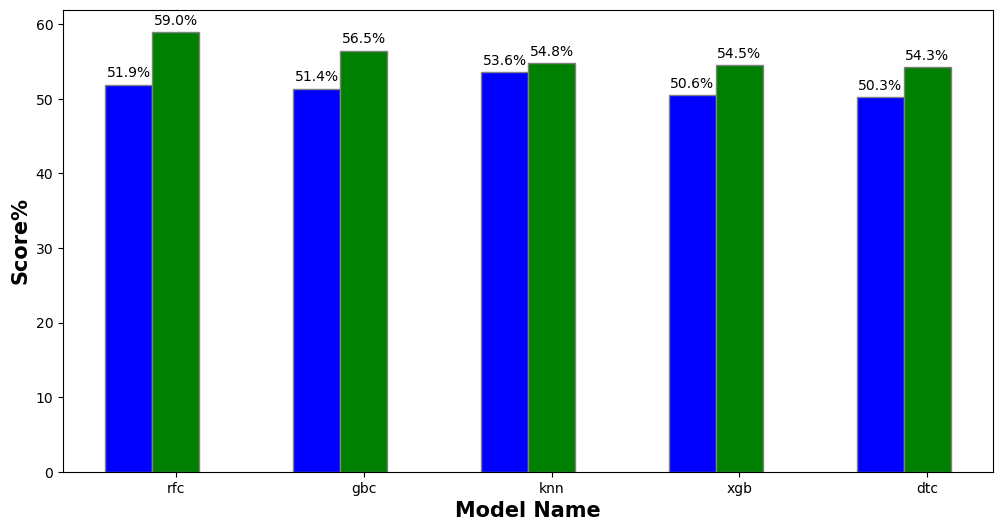

In [243]:
# Visualize the comparison
plt.figure(figsize = (12,6))

barWidth = 0.25
br1 = np.arange(len(accuracy_result)) 
br2 = [x + barWidth for x in br1] 

plt.bar(br1, accuracy_result, color ='b', width = barWidth, 
        edgecolor ='grey', label ='accuracy') 
plt.bar(br2, precision_result, color ='g', width = barWidth, 
        edgecolor ='grey', label ='precision') 

for i in range(len(accuracy_result)):
    plt.text(br1[i], accuracy_result[i] + 1, f'{accuracy_result[i]:.1f}%', ha='center', fontsize=10)
    plt.text(br2[i], precision_result[i] + 1, f'{precision_result[i]:.1f}%', ha='center', fontsize=10)

plt.xlabel('Model Name', fontweight ='bold', fontsize = 15) 
plt.ylabel('Score%', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(accuracy_result))], 
        model_name)

plt.show()

Based on the comparison, RFC (Random Forest Classifier) has the highest precision score 59% which means when the model predict 'up' or 1, 59% of the time it is correct. Based on that we choose to use RFC model to continue

# Hyper Parameter Tuning

In [244]:
#Data Splitting

data = xauusd01.copy()
start = 1500
step = 250

# Split point
i = start

# Training data (first i rows)
train = data.iloc[0:i].copy()

# Testing data (next 'step' rows after i)
test = data.iloc[i:i+step].copy()

# Optional: Check shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1500, 17)
Test shape: (250, 17)


In [251]:
X_test = test[new_predictors]
y_test = test['target']
X_train = train[new_predictors]
y_train = train['target']

In [299]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'n_estimators': randint(100, 500),              
    'max_depth': [3, 5, 10, 15, None],                      
    'min_samples_split': randint(2, 10),                        
    'min_samples_leaf': [1, 2, 4],                                 
    'random_state' : [1, 2]
}


# Create a random forest classifier
rf = RandomForestClassifier(min)

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_grid, 
                                 n_iter=50, 
                                 cv=5
                                 )

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 213, 'random_state': 2}


In [300]:
best_rf

RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=213, random_state=2)

In [285]:
model = RandomForestClassifier(random_state=1)
predictions = backtest(xauusd01, model, new_predictors)
base_model = metrics(predictions['target'], predictions['Predictions'])

In [301]:
model = best_rf
predictions = backtest(xauusd01, model, new_predictors)
tuned = metrics(predictions['target'], predictions['Predictions'])

In [302]:
results_df = pd.DataFrame([base_model, tuned], index=['Base Model', 'Tuned Model'])
results_df

,Accuracy,Precision,Recall
Base Model,0.516575,0.591304,0.346939
Tuned Model,0.453039,0.333333,0.010204


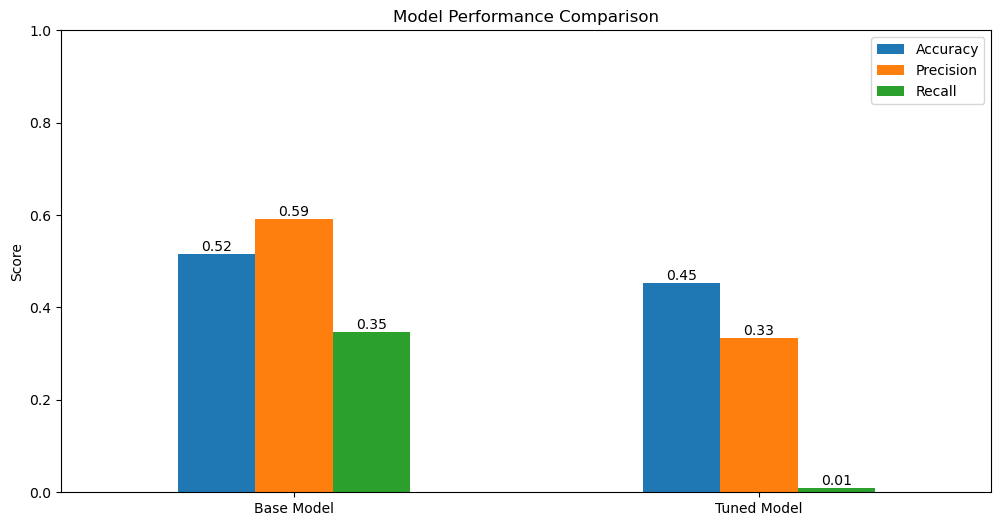

In [303]:
# Visualize the comparison

results_df.plot(kind='bar', figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)

# Value Labels
for i in plt.gca().containers:
    plt.bar_label(i, fmt='%.2f', label_type='edge')

plt.legend(loc='upper right')
plt.show()


Based on the result of the tuned hyperparameter, we decided to stick with default tuning and just using random_state = 1

In [305]:
# Visualize feature importances
import shap

importances = model.feature_importances_
feature_imp_df = pd.DataFrame({'Feature': new_predictors, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
feature_imp_df = feature_imp_df.sort_values
print(feature_imp_df)

<bound method DataFrame.sort_values of            Feature  Gini Importance
0     Close_Ratio2         0.151411
2     Close_Ratio5         0.148713
4    Close_Ratio60         0.136014
8  Close_Ratio1000         0.131518
6   Close_Ratio250         0.130409
9       Trend_1000         0.089136
7        Trend_250         0.080613
5         Trend_60         0.071493
3          Trend_5         0.038457
1          Trend_2         0.022236>


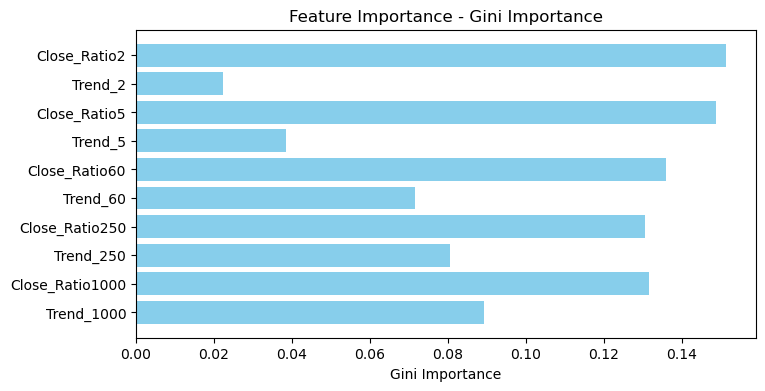

In [306]:
# Create a bar plot for feature importance
plt.figure(figsize=(8, 4))
plt.barh(new_predictors, importances, color='skyblue')
plt.xlabel('Gini Importance')
plt.title('Feature Importance - Gini Importance')
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

In [304]:
model = RandomForestClassifier(random_state=1)
predictions = backtest(xauusd01, model, new_predictors)
base_model = metrics(predictions['target'], predictions['Predictions'])
base_model

{'Accuracy': 0.5165745856353591,
 'Precision': 0.591304347826087,
 'Recall': 0.3469387755102041}

In [307]:
pred = model.predict(xauusd01[new_predictors])

if pred[0] == 1:
    print("Model says: BUY (price will go up)")
else:
    print("Model says: SELL (price will go down)")

Model says: SELL (price will go down)


In [308]:
xauusd01.tail()

,price,open,high,low,change,tomorrow,target,Close_Ratio2,Trend_2,Close_Ratio5,Trend_5,Close_Ratio60,Trend_60,Close_Ratio250,Trend_250,Close_Ratio1000,Trend_1000
date,,,,,,,,,,,,,,,,,
2024-12-23,2612.93,2622.24,2633.60,2607.97,-0.0030,2613.20,1,0.998502,1.0,1.000301,2.0,0.980712,33.0,1.093228,141.0,1.316807,528.0
2024-12-24,2613.20,2613.07,2621.83,2609.92,0.0001,2634.43,1,1.000052,1.0,1.002888,3.0,0.981118,33.0,1.092271,142.0,1.316391,528.0
2024-12-26,2634.43,2619.79,2639.40,2614.13,0.0081,2620.00,0,1.004046,2.0,1.007416,4.0,0.989233,34.0,1.100033,142.0,1.326534,528.0
2024-12-27,2620.00,2634.59,2638.74,2611.30,-0.0055,2605.39,0,0.997254,1.0,0.999898,3.0,0.984035,34.0,1.092918,142.0,1.318727,528.0
2024-12-30,2605.39,2620.30,2628.61,2595.90,-0.0056,2623.81,1,0.997204,0.0,0.995491,2.0,0.978835,34.0,1.085778,141.0,1.310845,528.0


In [309]:
# Save the model
import joblib

joblib.dump (model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [310]:
xauusd01.to_csv('xauusd.csv', index=True)